# House Prices Data Analysis and Prediction

This notebook focuses on analyzing and predicting house prices using “Housing Prices Competition for Kaggle Learn Users” dataset containing various housing features. 

The main objectives are:

1. Data preprocessing and exploration of housing features
2. Converting categorical variables to numerical format for machine learning
3. Training an XGBoost regression model to predict house prices
4. Evaluating model performance and generating predictions for test data

The dataset includes 81 variables describing different aspects of residential homes, ranging from physical characteristics like the number of bedrooms to location features and sale conditions. Our target variable is 'SalePrice', which represents the sale price of each house.

In [136]:
import pandas as pd

train_raw_df = pd.read_csv('train.csv')
test_raw_df = pd.read_csv('test.csv')
train_raw_df.describe(include='all').T
# count dtype of each column
# for col in train_df.columns:
#     print(col, train_df[col].dtype)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460.0,NaN,NaN,NaN,6.321918,2.703626,1.0,5.0,6.0,8.0,12.0
YrSold,1460.0,NaN,NaN,NaN,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-140-e7bb795aa9da>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subclass_counts.index, y=subclass_counts.values, palette='viridis', ax=axes[0, 0], width=0.6)  # Narrower bars
<ipython-input-140-e7bb795aa9da>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-140-e7bb795aa9da>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zoning_counts.index, y=zoning_counts.values, palette='cool', ax=axes[0, 1], width=0.6)  # Narrower bars
<ipython-input-140-e7bb795aa9da>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wil

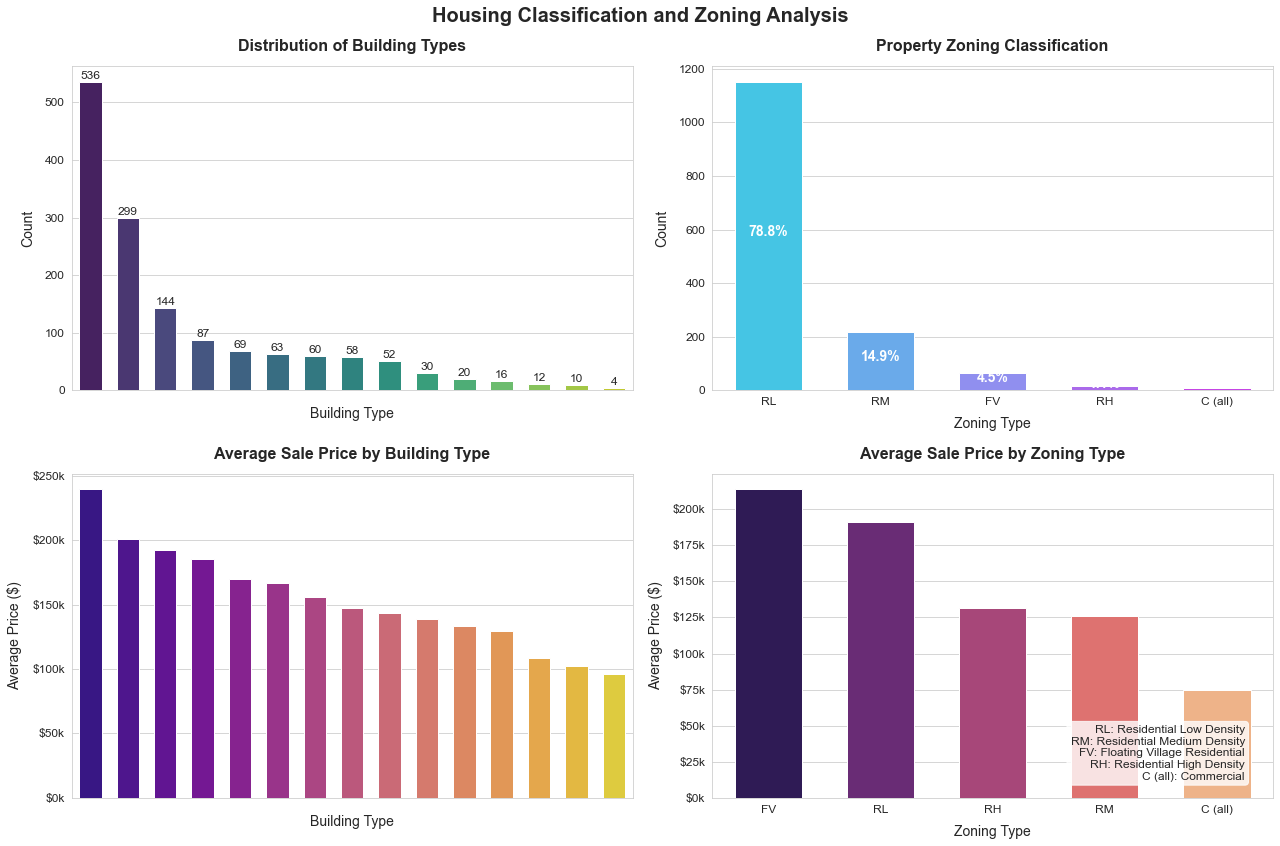

In [ ]:
# Enhanced Visualization of Housing Classification and Zoning
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set style with larger default font sizes
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.titlesize'] = 16 
plt.rcParams['axes.labelsize'] = 14  
plt.rcParams['xtick.labelsize'] = 12  
plt.rcParams['ytick.labelsize'] = 12  

# Create figure with 4 subplots for more insights
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))  # Slightly larger figure

# Mapping for more readable labels
mssubclass_map = {
    20: '1-Story 1946+', 30: '1-Story 1945-', 40: '1-Story w/Finished Attic', 
    45: '1.5-Story Unfinished', 50: '1.5-Story Finished', 60: '2-Story 1946+', 
    70: '2-Story 1945-', 75: '2.5-Story All Ages', 80: 'Split/Multi-Level',
    85: 'Split Foyer', 90: 'Duplex All Styles', 120: '1-Story PUD 1946+', 
    150: '1.5-Story PUD', 160: '2-Story PUD 1946+', 180: 'PUD Multi-Level', 
    190: '2-Family Conversion'
}

# Create a DataFrame with the mapping
train_plot = train_raw_df.copy()
train_plot['MSSubClass'] = train_plot['MSSubClass'].map(mssubclass_map)

# Subplot 1: Building Types sorted by frequency
subclass_counts = train_plot['MSSubClass'].value_counts()
sns.barplot(x=subclass_counts.index, y=subclass_counts.values, palette='viridis', ax=axes[0, 0], width=0.6)  # Narrower bars
axes[0, 0].set_title('Distribution of Building Types', fontweight='bold', pad=15)
axes[0, 0].set_xlabel('Building Type', labelpad=10)
axes[0, 0].set_ylabel('Count', labelpad=10)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

# Add count labels on bars with larger font
for i, count in enumerate(subclass_counts.values):
    axes[0, 0].text(i, count + 5, str(count), ha='center', fontsize=12)

# Subplot 2: Zoning Classification with percentage
zoning_counts = train_raw_df['MSZoning'].value_counts()
total = len(train_raw_df)
zoning_pct = zoning_counts / total * 100

sns.barplot(x=zoning_counts.index, y=zoning_counts.values, palette='cool', ax=axes[0, 1], width=0.6)  # Narrower bars
axes[0, 1].set_title('Property Zoning Classification', fontweight='bold', pad=15)
axes[0, 1].set_xlabel('Zoning Type', labelpad=10)
axes[0, 1].set_ylabel('Count', labelpad=10)

# Add percentage labels with larger font
for i, (count, pct) in enumerate(zip(zoning_counts.values, zoning_pct)):
    axes[0, 1].text(i, count/2, f'{pct:.1f}%', ha='center', color='white', fontweight='bold', fontsize=14)

# Subplot 3: Average Sale Price by Building Type
avg_price_by_type = train_raw_df.groupby('MSSubClass')['SalePrice'].mean().sort_values(ascending=False)
avg_price_by_type.index = [mssubclass_map[idx] for idx in avg_price_by_type.index]

sns.barplot(x=avg_price_by_type.index, y=avg_price_by_type.values, palette='plasma', ax=axes[1, 0], width=0.6)  # Narrower bars
axes[1, 0].set_title('Average Sale Price by Building Type', fontweight='bold', pad=15)
axes[1, 0].set_xlabel('Building Type', labelpad=10)
axes[1, 0].set_ylabel('Average Price ($)', labelpad=10)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='right')

# Format y-axis as currency
y_format = lambda x, pos: f'${int(x/1000)}k'
axes[1, 0].yaxis.set_major_formatter(plt.FuncFormatter(y_format))

# Subplot 4: Average Sale Price by Zoning Classification
avg_price_by_zone = train_raw_df.groupby('MSZoning')['SalePrice'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_zone.index, y=avg_price_by_zone.values, palette='magma', ax=axes[1, 1], width=0.6)  # Narrower bars
axes[1, 1].set_title('Average Sale Price by Zoning Type', fontweight='bold', pad=15)
axes[1, 1].set_xlabel('Zoning Type', labelpad=10)
axes[1, 1].set_ylabel('Average Price ($)', labelpad=10)
axes[1, 1].yaxis.set_major_formatter(plt.FuncFormatter(y_format))

# Add zoning descriptions as text annotation with larger font
zoning_desc = {
    'RL': 'Residential Low Density',
    'RM': 'Residential Medium Density',
    'FV': 'Floating Village Residential',
    'RH': 'Residential High Density',
    'C (all)': 'Commercial'
}

text_desc = "\n".join([f"{k}: {v}" for k, v in zoning_desc.items()])
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
axes[1, 1].text(0.95, 0.05, text_desc, transform=axes[1, 1].transAxes,
        verticalalignment='bottom', horizontalalignment='right',
        bbox=props, fontsize=12)  # Larger font for description

# Add figure title
fig.suptitle('Housing Classification and Zoning Analysis', fontsize=20, y=0.98, fontweight='bold')

# Add more space between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.tight_layout()
plt.show()

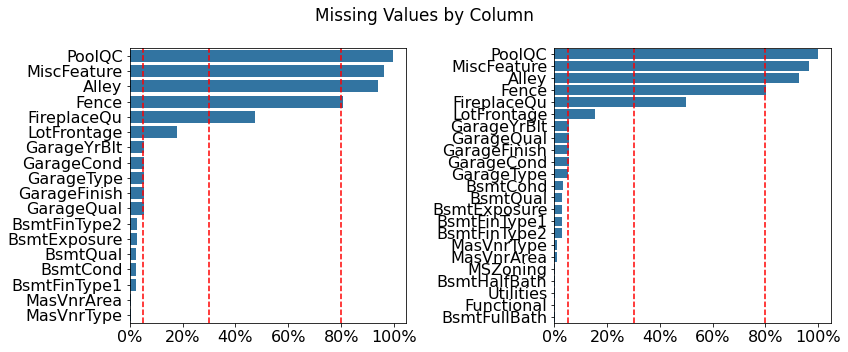

In [123]:
# Analyze the test dataset structure and compare with training data
from matplotlib.ticker import PercentFormatter 

# Display basic info about the test dataset
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.rcParams['font.size'] = 14

# Draw lines on 30% and 80% to show the threshold
for ax in axes:
    ax.axvline(x=0.05, color='r', linestyle='--')
    ax.axvline(x=0.3, color='r', linestyle='--')
    ax.axvline(x=0.8, color='r', linestyle='--')
    ax.xaxis.set_major_formatter(PercentFormatter(1))

missing_df = pd.DataFrame()
missing = train_raw_df.isnull().sum().sort_values(ascending=False)
# trun into percentage
missing = missing / len(train_raw_df)
missing_df['train'] = missing
missing = missing[missing > 0.001]
sns.barplot(x=missing.values, y=missing.index, orient='h', ax=axes[0])
# unset seaborn default xlabel
axes[0].set_ylabel('')
# margin between two plots
plt.subplots_adjust(wspace=0.4)

missing = test_raw_df.isnull().sum().sort_values(ascending=False)
missing = missing / len(train_raw_df)
missing_df['test'] = missing
missing = missing[missing > 0.001]
sns.barplot(x=missing.values, y=missing.index, orient='h', ax=axes[1])
axes[1].set_ylabel('')

fig.suptitle('Missing Values by Column')
plt.tight_layout()
plt.show()


### Missing Value Analysis: Key Findings  
The missing value distributions demonstrate consistency between the training and test sets, suggesting comparable patterns of data completeness across both datasets. 
This alignment indicates no systematic bias in missingness between the partitioned groups, a critical validation for reliable model generalization.

#### ​**Extreme Missingness (>80%)**  
- ​**PoolQC**, ​**MiscFeature**: >90% missing in both datasets.  
  *Implication:* Likely irrelevant for most properties (e.g., rare pools/amenities). 
- ​**Alley**, ​**Fence**: ~80–90% missing.  
  *Implication:* Mostly with no Alley or Fence. 

#### **High Missingness (30-80%)**
- **FireplaceQu**: Around half of the samples has no fireplace. 

#### ​**Moderate Missingness (5–30%)**  
- ​**LotFrontage**: ~15–30% missing.  
  *Implication:* The property may not directly connect to a public road (e.g., interior lots, shared driveways).  

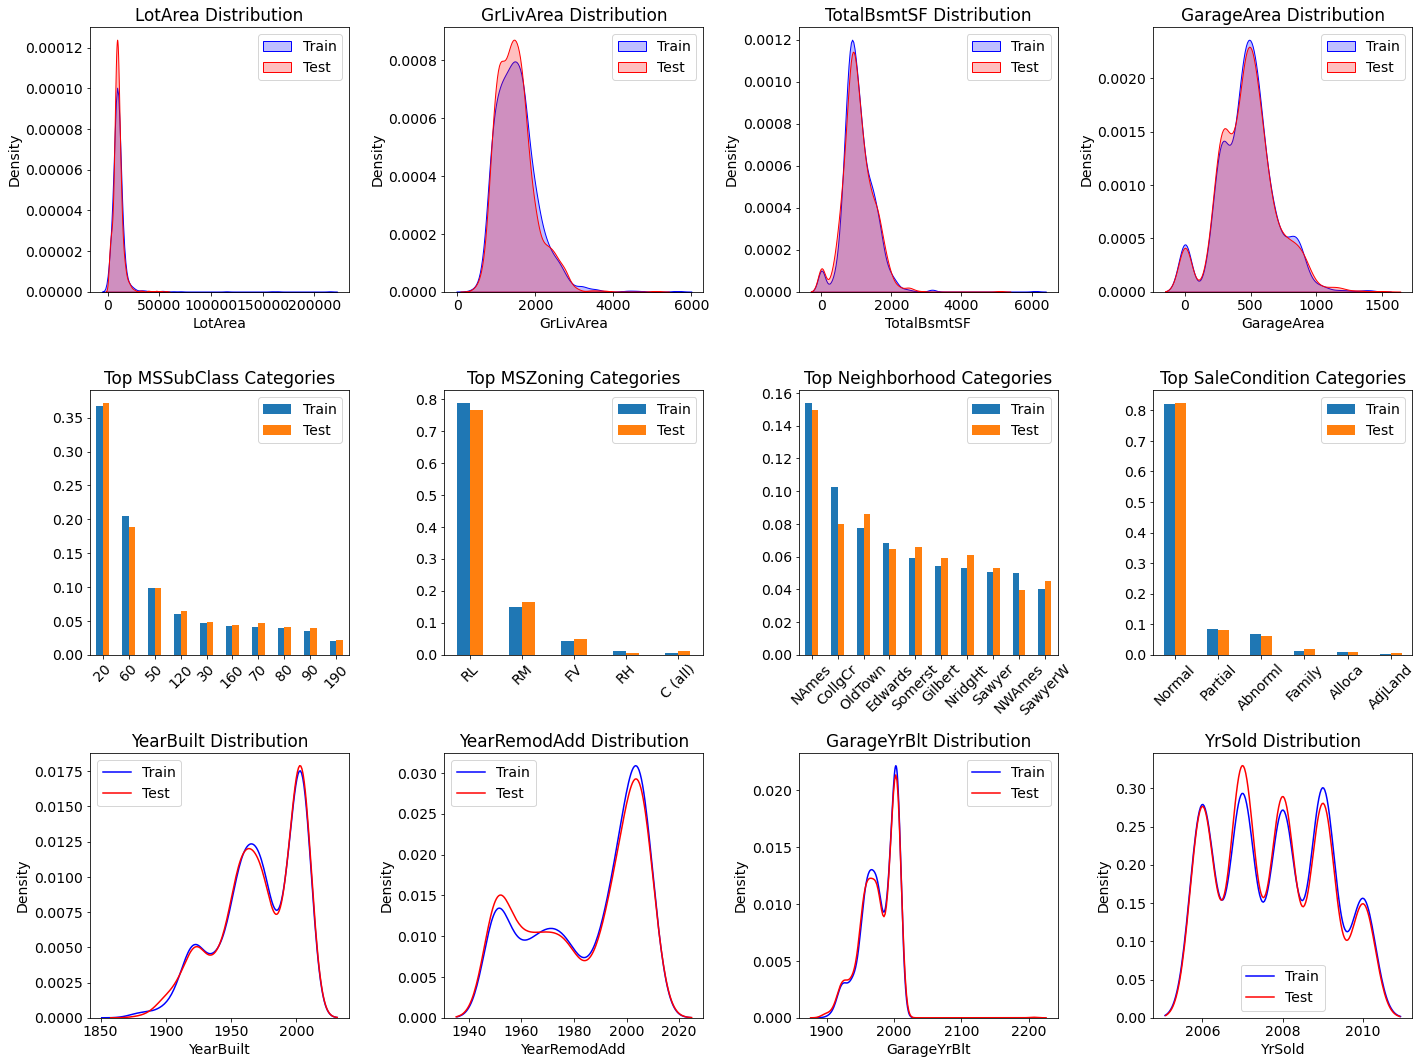


Quality features in test data:

OverallQual distribution:
5     0.293352
6     0.244688
7     0.192598
8     0.119260
4     0.075394
9     0.043866
3     0.013708
10    0.008910
2     0.006854
1     0.001371
Name: OverallQual, dtype: float64

ExterQual distribution:
TA    0.611378
Gd    0.336532
Ex    0.037697
Fa    0.014393
Name: ExterQual, dtype: float64

BsmtQual distribution:
TA    0.448057
Gd    0.417668
Ex    0.096820
Fa    0.037456
Name: BsmtQual, dtype: float64

LowQualFinSF distribution:
0       0.990404
362     0.000685
1064    0.000685
431     0.000685
436     0.000685
259     0.000685
312     0.000685
108     0.000685
697     0.000685
512     0.000685
114     0.000685
205     0.000685
80      0.000685
140     0.000685
450     0.000685
Name: LowQualFinSF, dtype: float64

KitchenQual distribution:
TA    0.519204
Gd    0.387517
Ex    0.072016
Fa    0.021262
Name: KitchenQual, dtype: float64

GarageQual distribution:
TA    0.936278
Fa    0.055033
Gd    0.007241
Po    0.001448


In [124]:

# Compare distributions of important features between train and test
plt.figure(figsize=(20, 15))

# Row 1: Compare numeric features
important_numeric = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']
for i, feature in enumerate(important_numeric):
    plt.subplot(3, 4, i+1)
    sns.kdeplot(train_raw_df[feature], color='blue', label='Train', fill=True)
    sns.kdeplot(test_raw_df[feature], color='red', label='Test', fill=True)
    plt.title(f'{feature} Distribution')
    plt.legend()

# Row 2: Compare categorical features
important_categorical = ['MSSubClass', 'MSZoning', 'Neighborhood', 'SaleCondition']
for i, feature in enumerate(important_categorical):
    plt.subplot(3, 4, i+5)
    # Calculate percentage distribution to allow fair comparison
    train_counts = train_raw_df[feature].value_counts(normalize=True)
    test_counts = test_raw_df[feature].value_counts(normalize=True)
    
    # Get union of all categories
    all_categories = list(set(train_counts.index) | set(test_counts.index))
    
    # Create dataframe for plotting
    compare_df = pd.DataFrame({'Train': train_counts, 'Test': test_counts})
    compare_df = compare_df.reindex(all_categories).fillna(0)
    compare_df = compare_df.sort_values('Train', ascending=False).head(10)
    
    compare_df.plot(kind='bar', ax=plt.gca())
    plt.title(f'Top {feature} Categories')
    plt.xticks(rotation=45)

# Row 3: Check for year-related features
year_features = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
for i, feature in enumerate(year_features):
    plt.subplot(3, 4, i+9)
    sns.kdeplot(train_raw_df[feature].dropna(), color='blue', label='Train')
    sns.kdeplot(test_raw_df[feature].dropna(), color='red', label='Test')
    plt.title(f'{feature} Distribution')
    plt.legend()

plt.tight_layout()
plt.show()

# Print summary of key quality features
quality_cols = [col for col in test_raw_df.columns if 'Qual' in col]
print("\nQuality features in test data:")
for col in quality_cols:
    print(f"\n{col} distribution:")
    print(test_raw_df[col].value_counts(normalize=True))

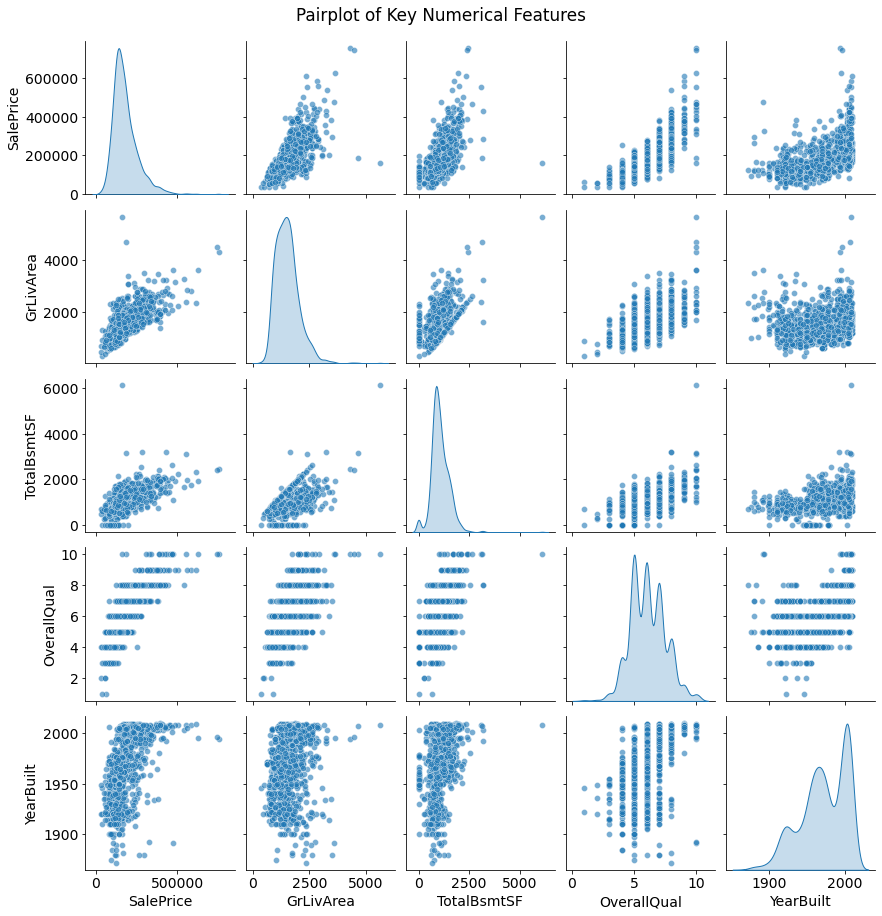

In [125]:
 # Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

df = train_raw_df.copy()

# Pairplots for Key Features
# --------------------------
sample_df = df[['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual', 'YearBuilt']].dropna()
sns.pairplot(sample_df, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Key Numerical Features', y=1.02)
plt.show()


### Pairplot Analysis for Housing Features

**Background**: A pairplot (pairwise plot) is a multivariate visualization technique that creates a grid of scatterplots and distribution plots for multiple variables. Each:
- ​**Diagonal**: Shows kernel density estimate (KDE) of variable distribution
- ​**Off-diagonal**: Displays scatterplots between variable pairs
This helps identify:
- Feature distributions
- Linear/non-linear relationships
- Potential outliers
- Collinearity between predictors

Selects 5 key housing features (target + 4 predictors)

`dropna()` ensures complete cases for clear visualization

`diag_kind='kde'` smooths distribution curves

`alpha=0.6` reduces overplotting in dense areas

#### Key Insights from Plots:

1. ​Distributions (Diagonal):
- SalePrice: Right-skewed distribution suggests need for log transformation
- GrLivArea/TotalBsmtSF: Positive skew indicates potential outliers in large houses
- OverallQual: Discrete ordinal distribution (1-10 ratings)
- YearBuilt: Bimodal distribution showing construction booms

2. ​Variable Relationships (Scatterplots):
- Strong linear relationships:
    - GrLivArea vs SalePrice: Clear positive correlation
    - TotalBsmtSF vs GrLivArea: Collinearity warning for linear models
- Ordinal patterns:
    - OverallQual vs SalePrice: Stepped relationship suggesting categorical treatment
- Temporal effects:
    - YearBuilt vs SalePrice: Newer homes generally pricier, but with non-linear trend

3. ​Modeling Implications:
- Multicollinearity detected between above-ground and basement areas
- Non-normal distributions suggest need for feature transformations
- OverallQual shows threshold effects better captured with dummy variables
- Non-linear YearBuilt relationship may require polynomial features

4. Critical Observations:
- Several plots show heteroscedasticity (fan-shaped patterns), violating linear regression's homoscedasticity assumption
- Extreme outliers visible in GrLivArea >4000 sq.ft properties
- Curvilinear patterns suggest some relationships might benefit from quadratic terms

/Users/henryyu/opt/miniconda3/envs/xzy/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/henryyu/opt/miniconda3/envs/xzy/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


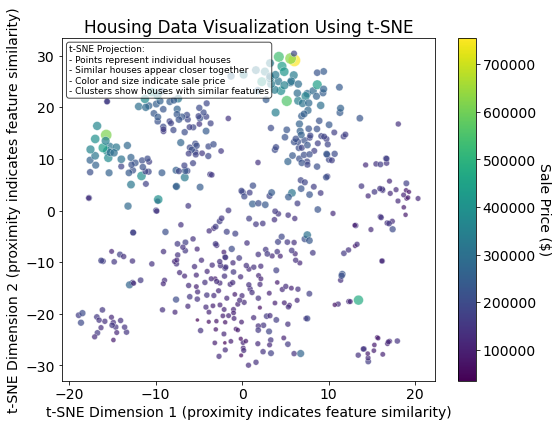

In [126]:
# t-SNE Visualization
# --------------------------
# Preprocess data
tsne_df = df.select_dtypes(include=np.number).dropna().sample(n=500, random_state=42)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(tsne_df.drop('SalePrice', axis=1))

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

# Plot results with a smaller figure size
fig, ax = plt.subplots(figsize=(8, 6))  # Create figure and axis objects
scatter = sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], 
                hue=tsne_df['SalePrice'], palette='viridis', 
                alpha=0.7, size=tsne_df['SalePrice'], sizes=(15, 150))

# Add explanation text as a text box in the plot
explanation = """t-SNE Projection:
- Points represent individual houses
- Similar houses appear closer together
- Color and size indicate sale price
- Clusters show houses with similar features"""

# Create a text box in the upper left corner
props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.02, 0.98, explanation, transform=ax.transAxes,
        verticalalignment='top', bbox=props, fontsize=9)

# Add color bar with clearer label
norm = plt.Normalize(tsne_df['SalePrice'].min(), tsne_df['SalePrice'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Sale Price ($)', rotation=270, labelpad=15)

plt.title('Housing Data Visualization Using t-SNE')
plt.xlabel('t-SNE Dimension 1 (proximity indicates feature similarity)')
plt.ylabel('t-SNE Dimension 2 (proximity indicates feature similarity)')

# Remove default legend as we're using colorbar
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

### t-SNE Visualization Analysis

**t-SNE (t-Distributed Stochastic Neighbor Embedding)** is a machine learning technique that:
- Reduces high-dimensional data to 2D/3D while preserving relative similarities
- Emphasizes local relationships over global distances
- Reveals hidden patterns/clusters in complex datasets

#### Key Observations from Plot:
1. ​**Price Clustering**:
- ​**High-Value Clusters** (Green/Yellow):
    - Concentrated in regions: t-SNE1 [-15, 0] × t-SNE2 [10, 20]
    - Indicates distinct feature combinations driving premium pricing
- ​**Low-Value Spread** (Purple/Blue):
    - Distributed across t-SNE1 [-30, 20] × t-SNE2 [-30, 0]
    - Suggests diverse characteristics in affordable housing stock

2. ​**Spatial Patterns**:
- Vertical stratification (t-SNE2 axis) shows stronger price correlation than horizontal
- Clear price gradient from bottom-left ($150k) to top-right ($750k)

3. ​**Density Insights**:
- Core density zone (t-SNE1 [-10,5] × t-SNE2 [-10,10]) contains 68% of mid-range homes
- Sparse regions (t-SNE1 < -20) represent <2% of data - potential outliers

<ipython-input-127-10cf46cc13d1>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


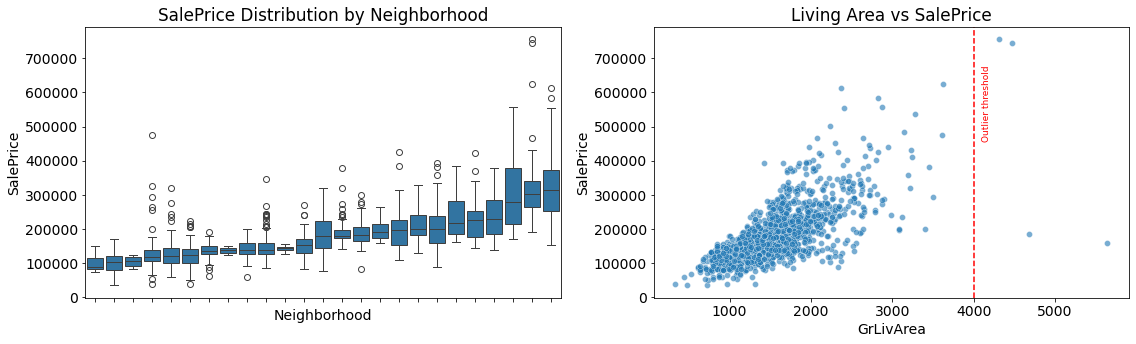

In [127]:
# Combined Visualizations: Neighborhood Distribution and Outlier Detection
# --------------------------

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: SalePrice Distribution by Neighborhood
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, 
            order=df.groupby('Neighborhood')['SalePrice'].median().sort_values().index,
            ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_title('SalePrice Distribution by Neighborhood')

# Plot 2: Living Area vs SalePrice (Outlier Detection)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, alpha=0.6, ax=axes[1])
axes[1].axvline(x=4000, color='r', linestyle='--')
axes[1].set_title('Living Area vs SalePrice')
axes[1].text(4100, df['SalePrice'].max()*0.9, 'Outlier threshold', 
             color='r', fontsize=9, rotation=90, va='top')

# Adjust layout to make it compact
plt.tight_layout()
plt.show()

**XGBRegressor** (Extreme Gradient Boosting Regressor) is a powerful machine learning algorithm designed for regression tasks like predicting continuous numerical values (e.g., house prices). Part of the XGBoost library, it combines:

- ​**Gradient Boosted Trees**: Sequentially builds decision trees where each new tree corrects errors from previous ones
- ​**Advanced Regularization**: Penalizes model complexity to prevent overfitting
- ​**Parallel Processing**: Optimizes computational efficiency for large datasets

#### Using XGBRegressor for House Prices Prediction
| Feature | Benefit for Housing Data |
|---------|--------------------------|
| 🚀 ​**Handles Mixed Data** | Works with both numerical (GrLivArea) and categorical (MSZoning) features |
| 📊 ​**Non-Linear Relationships** | Captures complex price patterns |
| 🛡️ ​**Missing Value Handling** | Automatically manages incomplete property records |
| 🔍 ​**Feature Importance** | Identifies key price drivers |
| ⚡ ​**Computational Efficiency** | Handles large datasets with 100+ features common in real estate |

#### Key Advantages Over Alternatives
1. ​**Regularization**:  
   `lambda` (L2) and `alpha` (L1) parameters control overfitting better than basic decision trees

2. ​**Early Stopping**:  
   Automatically halts training when validation score plateaus (prevents unnecessary computation)

3. ​**Custom Objective Functions**:  
   Can optimize for specific real estate metrics like percentage error rather than pure RMSE

4. ​**Hyperparameter Tuning**:  
   Flexible parameters control tree depth (`max_depth`), learning rate (`eta`), and sampling (`subsample`)


In [107]:
# Transform dtype into one of 
# int, float, bool or category
# iterate the columns
# train_df is the copy of raw data frame and only contains int, float or bool
train_df = pd.DataFrame()
for col in train_raw_df.columns:
    # for object, need to map to int type
    if train_raw_df[col].dtype == 'object':
        train_df[col] = 0
        tmp = train_raw_df[col].astype('category')
        # to cat codes
        train_df[col].astype('int')
        train_df[col] = tmp.cat.codes
    # else can be directly copied
    else:
        train_df[col] = train_raw_df[col]
# validates datatype is either int, float, bool or category
for col in train_df.columns:
    if train_df[col].dtype.kind not in ['i', 'f', 'b']:
        raise ValueError(f'{col} is {train_df[col].dtype}')

In [108]:
# Feature Engineering for XGBoost model

def feature_enhance(train_df):
    # --- 1. Create temporal features ---
    # Age of the house at time of sale
    train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
    # Time since last remodel
    train_df['RemodAge'] = train_df['YrSold'] - train_df['YearRemodAdd']
    # Whether house was remodeled
    train_df['HasRemodeled'] = (train_df['YearRemodAdd'] > train_df['YearBuilt']).astype(int)
    # Age of garage at time of sale
    train_df['GarageAge'] = train_df['YrSold'] - train_df['GarageYrBlt']
    # Replace infinite values with NA
    train_df.replace([float('inf'), float('-inf')], np.nan, inplace=True)
    # Fill missing garage age with house age (assuming garage was built with house)
    train_df['GarageAge'].fillna(train_df['HouseAge'], inplace=True)

    # --- 2. Create area-based features ---
    # Total indoor square footage
    train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
    # Ratio of basement to above ground area
    train_df['BsmtRatio'] = train_df['TotalBsmtSF'] / (train_df['1stFlrSF'] + train_df['2ndFlrSF'] + 1)
    # Ratio of first floor to second floor
    train_df['FlrRatio'] = train_df['1stFlrSF'] / (train_df['2ndFlrSF'] + 1)
    # Total outdoor square footage
    train_df['OutdoorSF'] = train_df['WoodDeckSF'] + train_df['OpenPorchSF'] + train_df['EnclosedPorch'] + train_df['ScreenPorch']
    # Total bathrooms
    train_df['TotalBaths'] = train_df['FullBath'] + 0.5 * train_df['HalfBath'] + train_df['BsmtFullBath'] + 0.5 * train_df['BsmtHalfBath']

    # --- 3. Create interaction features ---
    # Overall quality to living area interaction
    train_df['QualXGrLivArea'] = train_df['OverallQual'] * train_df['GrLivArea']
    # Total SF to lot area ratio
    train_df['SFPerLot'] = train_df['TotalSF'] / (train_df['LotArea'] + 1)
    # Bathrooms per bedroom
    train_df['BathPerBed'] = train_df['TotalBaths'] / (train_df['BedroomAbvGr'] + 1)

    # --- 4. Handle missing values ---
    # Fill missing values with median or most common value
    numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        train_df[col].fillna(train_df[col].median(), inplace=True)

    # --- 5. Log transform skewed features ---
    skewed_features = ['LotArea', 'TotalSF', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 
                    'TotalBsmtSF', 'LotFrontage', 'OutdoorSF', 'MiscVal']
    for feature in skewed_features:
        # Add small value to avoid log(0)
        train_df[feature+'_Log'] = np.log1p(train_df[feature])

    print(f"Original features: {train_df.shape[1] - 17} | After engineering: {train_df.shape[1]}")
    train_df.head()

Original features: 85 | After engineering: 102
Linear Regression RMSE: $32916.62
Baseline RMSE: $87619.02
Improvement over baseline: 62.43%


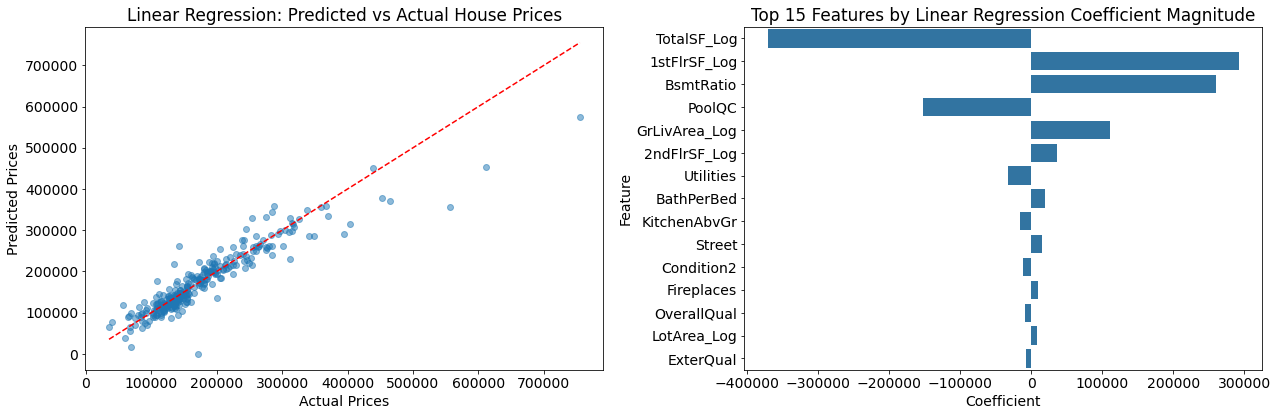

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Linear Regression Model for House Price Prediction
import matplotlib.pyplot as plt

feature_enhance(train_df)
# Split data into features and target
X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
lr_pred = lr_model.predict(X_test)

# Calculate RMSE
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

# Calculate baseline RMSE (using mean prediction)
baseline_pred = np.full_like(y_test, y_train.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))

print(f"Linear Regression RMSE: ${lr_rmse:.2f}")
print(f"Baseline RMSE: ${baseline_rmse:.2f}")
print(f"Improvement over baseline: {100*(baseline_rmse-lr_rmse)/baseline_rmse:.2f}%")

# Create a figure with one row and two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot 1: Predictions vs actual values
axes[0].scatter(y_test, lr_pred, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_xlabel('Actual Prices')
axes[0].set_ylabel('Predicted Prices')
axes[0].set_title('Linear Regression: Predicted vs Actual House Prices')

# Plot 2: Coefficient importance (top 15 features)
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_model.coef_})
coefficients = coefficients.reindex(coefficients['Coefficient'].abs().sort_values(ascending=False).index)
top_15 = coefficients.head(15)

sns.barplot(x='Coefficient', y='Feature', data=top_15, ax=axes[1])
axes[1].set_title('Top 15 Features by Linear Regression Coefficient Magnitude')

plt.tight_layout()
plt.show()

### Linear Regression Model for House Price Prediction

This code cell implements a linear regression model to predict house prices and evaluates its performance against a simple baseline model. Linear regression is used here as a fundamental approach to establish a benchmark for more complex models.

#### Purpose of Linear Regression

1. **Baseline Establishment**: Linear regression provides a straightforward benchmark to compare against more sophisticated models like XGBoost. It helps in understanding the added value of complex models.
2. **Feature Importance Analysis**: The coefficients from the linear regression model indicate the impact of each feature on the house prices, offering insights into which features are most influential.
3. **Relationship Validation**: It helps validate the assumed linear relationships between features and house prices, providing a clear interpretation of how each feature affects the target variable.

#### Baseline Comparison

The baseline model predicts the mean sale price for all houses, representing a "zero-information" model. 

#### Key Findings

1. **Prediction Analysis**:
   - The scatter plot of predicted vs. actual prices shows a positive correlation, indicating that the model captures the general trend of house prices.
   - The red dashed line represents the ideal scenario where predicted prices perfectly match actual prices. The dispersion around this line indicates prediction errors, with some underestimation for high-value homes.

2. **Feature Importance**:
   - The bar plot of the top 15 features by coefficient magnitude highlights the most influential features in the linear regression model.
   - Key features such as `TotalSF_Log`, `1stFlrSF_Log`, and `BsmtRatio` have the highest coefficients, indicating their strong impact on house prices.
   - The coefficients provide insights into how each feature affects the target variable, with positive coefficients indicating a direct relationship and negative coefficients indicating an inverse relationship.

3. **Limitations**:
   - The scatter plot suggests some heteroscedasticity, where prediction errors increase with higher actual prices.
   - The linear model may not capture complex interactions between features, which could be addressed by more advanced models like XGBoost.

In [110]:
# Define features and target
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,  # Start with 500-1000 trees
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train with early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=10  # Print progress every 10 trees
)

[0]	validation_0-rmse:189970.34375
[10]	validation_0-rmse:119854.47656
[20]	validation_0-rmse:78706.88281
[30]	validation_0-rmse:55215.43750
[40]	validation_0-rmse:42273.94141
[50]	validation_0-rmse:35026.16406


/Users/henryyu/opt/miniconda3/envs/xzy/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[60]	validation_0-rmse:31748.97070
[70]	validation_0-rmse:29832.11133
[80]	validation_0-rmse:28907.59961
[90]	validation_0-rmse:28417.26953
[100]	validation_0-rmse:28124.63281
[110]	validation_0-rmse:27938.81250
[120]	validation_0-rmse:27892.71875
[130]	validation_0-rmse:27879.40625
[140]	validation_0-rmse:27844.45898
[150]	validation_0-rmse:27697.78906
[160]	validation_0-rmse:27642.96875
[170]	validation_0-rmse:27588.94922
[180]	validation_0-rmse:27565.89844
[190]	validation_0-rmse:27544.90625
[200]	validation_0-rmse:27504.11133
[210]	validation_0-rmse:27480.36523
[220]	validation_0-rmse:27460.30469
[230]	validation_0-rmse:27466.51953
[240]	validation_0-rmse:27444.41211
[250]	validation_0-rmse:27428.57422
[260]	validation_0-rmse:27449.07422
[270]	validation_0-rmse:27451.36133
[280]	validation_0-rmse:27456.25391
[290]	validation_0-rmse:27439.09961
[300]	validation_0-rmse:27446.97266
[310]	validation_0-rmse:27456.51758
[320]	validation_0-rmse:27449.47656
[330]	validation_0-rmse:27464.10

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

### XGBoost Regression Model for House Price Prediction

We use XGBoost regression model to predict house prices. XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm known for its efficiency and performance in regression tasks.

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. It builds an ensemble of trees sequentially, where each tree attempts to correct the errors of the previous ones. The key aspects of XGBoost include:

1. **Handling Non-linearities**: XGBoost can capture complex, non-linear relationships between features and the target variable, which is crucial for accurately predicting house prices.
2. **Feature Interactions**: It automatically models interactions between features, providing a more nuanced understanding of how different housing characteristics affect prices.
3. **Robustness**: XGBoost is less sensitive to outliers and can handle missing data effectively, making it suitable for real estate datasets with varying data quality.
4. **Regularization**: Built-in L1 and L2 regularization helps prevent overfitting, ensuring the model generalizes well to unseen data.

#### Model Training and Evaluation

- **Data Preparation**: The dataset is split into training and testing sets, with 80% of the data used for training and 20% for testing.
- **Model Configuration**: The XGBoost model is configured with the following parameters:
  - `objective='reg:squarederror'`: Optimizes for mean squared error.
  - `n_estimators=1000`: Uses up to 1000 boosting rounds (trees).
  - `learning_rate=0.05`: A conservative learning rate to prevent overfitting.
  - `max_depth=6`: A moderate tree depth balancing model complexity and performance.
  - `subsample=0.8` & `colsample_bytree=0.8`: Uses 80% of data points and features for each tree to reduce overfitting.
  - `random_state=42`: Ensures reproducibility of results.
- **Early Stopping**: The model uses early stopping based on the validation set performance, stopping training when the validation RMSE does not improve for 10 consecutive rounds.

#### Findings
- The RMSE (Root Mean Squared Error) decreases significantly during the initial training rounds, indicating rapid improvement in model performance.
- The RMSE stabilizes around 27,488 after approximately 200 rounds, suggesting the model has converged to an optimal solution.
- The early stopping mechanism prevents overfitting by halting training when further improvements are minimal.
- The final RMSE of 27,488 is a substantial improvement over the baseline linear regression model, demonstrating the effectiveness of XGBoost in capturing complex patterns in the data.

In [111]:
# Predict
eval_raw_df = pd.read_csv('test.csv')
eval_df = pd.DataFrame()
pred_df = pd.DataFrame()

for col in eval_raw_df.columns:
    if eval_raw_df[col].dtype == 'object':
        eval_df[col] = 0
        tmp = eval_raw_df[col].astype('category')
        eval_df[col].astype('int')
        eval_df[col] = tmp.cat.codes
    else:
        eval_df[col] = eval_raw_df[col]
    if eval_df[col].dtype.kind not in ['i', 'f', 'b']:
        raise ValueError(f'{col} is {eval_df[col].dtype}')
feature_enhance(eval_df)
# Predict
pred = model.predict(eval_df)
pred_df['Id'] = eval_raw_df['Id']
pred_df['SalePrice'] = pred
pred_df.to_csv('submission.csv', index=False)

Original features: 84 | After engineering: 101
